# Case - Preparando um dataset para o cálculo de indicadores RFM de uma empresa de e-commerce

## Introdução

Uma empresa do ramo de e-commerce tem uma base de dados contendo diversas informações dos seus clientes ao redor do mundo. Fazendo uma análise criteriosa, esta deseja levantar os indicadores RFM destes clientes, sendo RFM definido por:

- R (Recency): Tempo que o cliente realizou a última compra (em dias)
- F (Frequency): Quantidade de compras realizadas pelo cliente
- M (Monetary): Valor do ticket médio gasto pelo cliente. Onde ticket médio = média do total gasto por pedido para cada cliente.

Além disso, necessita também de gráficos contendo informações valiosas de valores de venda por país, por produto e por mês.

## Objetivo do projeto

A partir da base de dados disponibilizada pela empresa, gerar um output em csv contendo apenas a identificação dos clientes e as métricas RFM calculadas. E, plotar os seguintes gráficos solicitados:

- Top 10 países com maior valor em vendas;
- Top 10 produtos mais vendidos;
- Valor de venda total por mês;
- Valor de venda total por mês e por país (considerando apenas o top 10).

## Sobre os dados

A tabela contém informações de compras de um e-commerce em 37 países. Contém a identificação do cliente e os dados da compra.

- CustomerID = Código de identificação do cliente;
- Description = Descrição do produto;
- InvoiceNo = Código da fatura;
- StockCode = Código de estoque do produto;
- Quantity = Quantidade do produto;
- InvoiceDate = Data do faturamento (compra);
- UnitPrice = Preço unitário do produto;
- Country = País da compra.

## Análise dos dados e data cleaning

### Importando o dataset

Para realizar a leitura do dataset em arquivo csv, utiliza-se da biblioteca Pandas,

In [1]:
import pandas as pd

customer_df = pd.read_csv('data.csv', encoding = 'unicode_escape')
customer_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


### Tratando missing data

Feita a importação, utiliza-se da função info() para avaliar os tipos de dados por coluna, a quantidade de entradas no dataset e também a existência ou não de dados nulos.

In [2]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


Pelo resultado acima, tem-se um dataset com 541909 entradas. Avaliando a quantidade de dados não nulos por coluna, percebe-se que as colunas "Description" e "CustomerID" não tem todas as entradas preenchidas com dados não nulos.

Isto fica mais claro a partir do código abaixo, onde definiu-se um Data Frame contendo quantidade e porcentagem de dados nulos por coluna do dataset original.

In [3]:
quantity = customer_df.isna().sum()
pct = (customer_df.isna().sum())/customer_df.shape[0]

missing_data = quantity.to_frame('missing_count').join(pct.to_frame('missing_pct'))

# formatando os dados para exibir em porcentagem
missing_data = missing_data.style.format('{:.2%}', subset = ['missing_pct'])

In [4]:
missing_data

,missing_count,missing_pct
InvoiceNo,0,0.00%
StockCode,0,0.00%
Description,1454,0.27%
Quantity,0,0.00%
InvoiceDate,0,0.00%
UnitPrice,0,0.00%
CustomerID,135080,24.93%
Country,0,0.00%


Assim, em "Description" tem-se 1454 dados nulos, que representa 0,27% dos dados totais desta coluna.

Já em "CustomerID" existem 135080 dados nulos, que representa 24,93% dos dados totais. Esta é uma porcentagem relativamente alta, portanto torna-se necessário avaliar mais afundo se existe algum motivo aparente que justifique estes dados nulos.

Desta forma, pode-se avaliar a distribuição dos nulos ao longo do dataset, utilizando a biblioteca missingno conforme demonstrado abaixo.

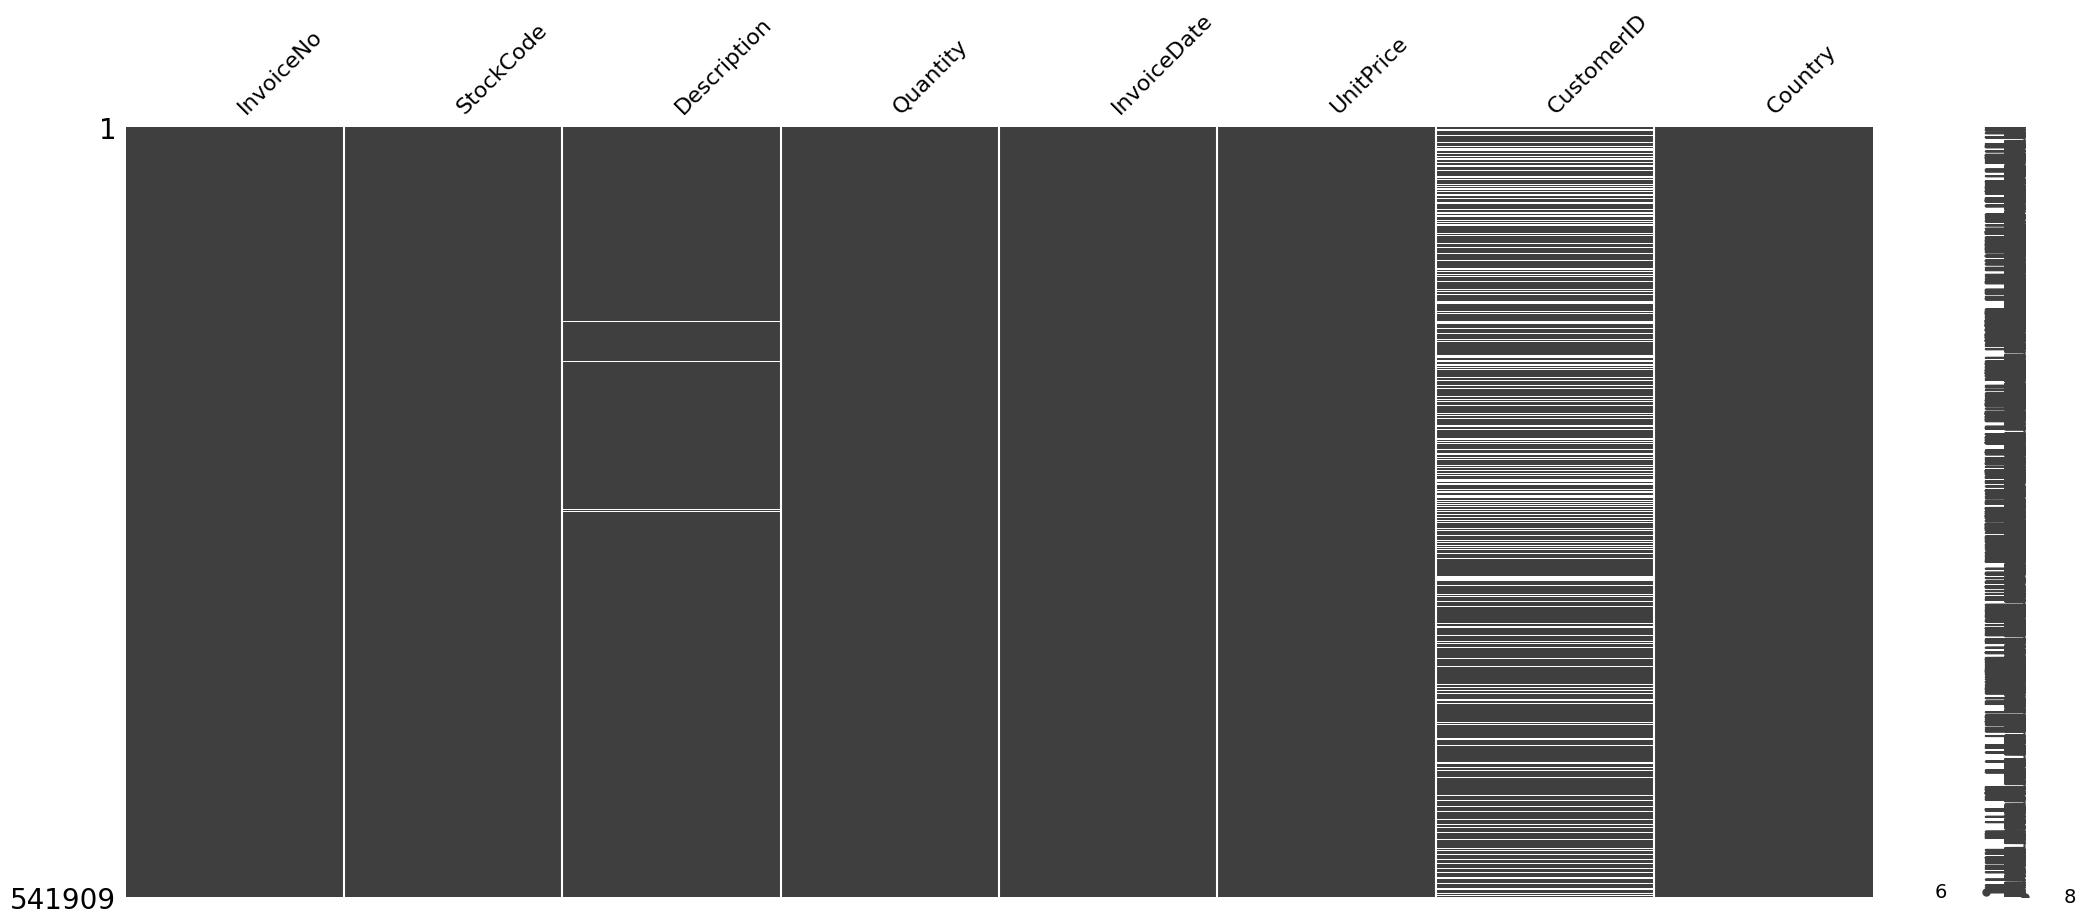

In [5]:
import missingno as msno

msno.matrix(df = customer_df);

Avaliando-se o resultado acima, tanto os dados nulos da coluna "CustomerID" quanto da coluna "Description" estão destribuídos de forma aleatória ao longo do dataset. Ou seja, não é possível estabelecer algum padrão para estes casos.

Exibindo-se então somente as linhas com dados nulos,

In [6]:
customer_df[customer_df.isna().any(axis=1)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,12/9/2011 10:26,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,12/9/2011 10:26,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,12/9/2011 10:26,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,12/9/2011 10:26,10.79,NaN,United Kingdom


Observando a quantidade de entradas com algum dado nulo (135080), comparando com as quantidades de dados nulos mostrados por coluna anteriormente (missing_data), é possível afirmar que todas as linhas com dados nulos na coluna "Description" também tem dado nulo na coluna "CustomerID". Isto fica claro filtrando o dataset somente pelos dados nulos de "Description", conforme demonstrado abaixo,

In [7]:
description_missing = customer_df[customer_df['Description'].isna()]

In [8]:
description_missing.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,12/1/2010 14:32,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,12/1/2010 14:34,0.0,NaN,United Kingdom


Tomando somente os valores presentes na coluna "CustomerID",

In [9]:
description_missing['CustomerID'].unique()

array([nan])

Assim, excluindo-se todos os dados nulos presentes na coluna "CustomerID", estaremos excluindo também todos da coluna "Description" e, consequentemente, do dataset inteiro.

Como não tem-se elementos suficientes para descobrir quais são os dados nulos da coluna "CustomerID", visto que são códigos únicos por cliente, e cada cliente pode ter feito qualquer compra, de qualquer produto, em qualquer país, optou-se por excluir do dataset todos as linhas em que esta coluna apresenta dados nulos.

In [10]:
customer_df.dropna(subset = 'CustomerID', inplace = True)

In [11]:
customer_df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

Não existe mais nenhum dado nulo no dataset.

### Linhas duplicadas

Verificando-se a existência de linhas duplicadas,

In [12]:
customer_df.duplicated().sum()

5225

Portanto, existem 5225 linhas com dados duplicados neste dataset. Imprimindo algumas delas em tela,

In [13]:
customer_df[customer_df.duplicated(keep = False)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
489,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
521,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,12/9/2011 11:34,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,12/9/2011 11:34,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,12/9/2011 11:34,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,12/9/2011 11:34,2.10,14446.0,United Kingdom


Como não faz sentido uma mesma compra para o mesmo cliente no mesmo horário, com os mesmos valores, é conveniente e acertivo eliminar todas as linhas duplicadas do dataset.

In [14]:
customer_df.drop_duplicates(inplace = True)

In [15]:
customer_df.duplicated().sum()

0

### Tratando o tipo dos dados de cada coluna

Avaliando-se agora os tipos de dados por coluna,

In [16]:
customer_df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

Percebe-se que as colunas "CustomerID" e "InvoiceDate" apresentam tipos de dados incoerentes se comparado as informações que estas colunas retratam.

A coluna "CustomerID" traz o código de identificação do cliente, este é um valor único para cada um. Portanto, não faz sentido que este dado seja um número decimal, teria que ser um número inteiro. Assim, converteu-se os dados desta coluna conforme segue abaixo,

In [17]:
customer_df['CustomerID'] = customer_df['CustomerID'].astype('int')

In [18]:
customer_df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID       int32
Country         object
dtype: object

Agora, é necessário converter os dados da coluna "InvoiceDate" para datetime, pois se tratam de datas.

In [19]:
customer_df['InvoiceDate'] = pd.to_datetime(customer_df['InvoiceDate'])

In [20]:
customer_df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID              int32
Country                object
dtype: object

### Avaliando os valores de cada coluna do dataset

Com o tipo de dado devidamente ajustado para cada coluna, avaliou-se agora se existem incoerências com os valores em si nelas presentes, excluindo os dados das "InvoiceNo", "StockCode" e "CustomerID" pois se tratam de códigos unitários da empresa.

Buscando primeiro os dados da coluna "Country",

In [21]:
customer_df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Saudi Arabia', 'Czech Republic', 'Canada',
       'Unspecified', 'Brazil', 'USA', 'European Community', 'Bahrain',
       'Malta', 'RSA'], dtype=object)

In [22]:
customer_df['Country'].value_counts()

Country
United Kingdom          356728
Germany                   9480
France                    8475
EIRE                      7475
Spain                     2528
Netherlands               2371
Belgium                   2069
Switzerland               1877
Portugal                  1471
Australia                 1258
Norway                    1086
Italy                      803
Channel Islands            757
Finland                    695
Cyprus                     611
Sweden                     461
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
USA                        291
Israel                     247
Unspecified                241
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon                     45


Todos os dados presentes nesta coluna de fato se tratam de países, exceto pelo "Unspecified". Porém como não é possível saber se este campo era de preenchimento obrigatório ou não, podemos deixar estes valores no dataset.

Avaliando se existem valores menores ou iguais a zero na coluna "UnitPrice",

In [23]:
customer_df[customer_df['UnitPrice']<=0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,2010-12-05 14:02:00,0.0,12647,Germany
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,2010-12-16 14:36:00,0.0,16560,United Kingdom
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10,2010-12-21 13:45:00,0.0,14911,EIRE
47068,540372,22090,PAPER BUNTING RETROSPOT,24,2011-01-06 16:41:00,0.0,13081,United Kingdom
47070,540372,22553,PLASTERS IN TIN SKULLS,24,2011-01-06 16:41:00,0.0,13081,United Kingdom
56674,541109,22168,ORGANISER WOOD ANTIQUE WHITE,1,2011-01-13 15:10:00,0.0,15107,United Kingdom
86789,543599,84535B,FAIRY CAKES NOTEBOOK A6 SIZE,16,2011-02-10 13:08:00,0.0,17560,United Kingdom
130188,547417,22062,CERAMIC BOWL WITH LOVE HEART DESIGN,36,2011-03-23 10:25:00,0.0,13239,United Kingdom
139453,548318,22055,MINI CAKE STAND HANGING STRAWBERY,5,2011-03-30 12:45:00,0.0,13113,United Kingdom
145208,548871,22162,HEART GARLAND RUSTIC PADDED,2,2011-04-04 14:42:00,0.0,14410,United Kingdom


Pelo resultado acima, existem diversas colunas em que o preço unitário do produto está zerado, o que não faz sentido para a análise. Portanto, excluíu-se estas linhas do dataset.

In [24]:
customer_df = customer_df[customer_df['UnitPrice']>0]

Da mesma forma, avaliou-se a coluna "Quantity" em busca de valores menores ou iguais a zero.

In [25]:
customer_df[customer_df['Quantity']<=0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315,United Kingdom


Logo, tem-se 8872 linhas com quantidades negativas. Uma opção, caso existesse a informação de que estas quantidades negativas são provenientes de algum erro de digitação, seria converter estes dados para o tipo string, retirar o hífen "-" e depois converter novamente para números inteiros. Contudo, como não temos a informação se existe essa possibilidade de erro humano, optou-se por excluir estas linhas da análise.

In [26]:
customer_df = customer_df[customer_df['Quantity']>0]

### Estatísticas Descritivas e Outliers

Utilizando a função describe para observar a distribuição dos dados nas colunas numéricas (exceto da coluna "CustomerID")

In [31]:
customer_df.select_dtypes('number').drop(columns = 'CustomerID').describe()

,Quantity,UnitPrice
count,392692.000000,392692.000000
mean,13.119702,3.125914
std,180.492832,22.241836
min,1.000000,0.001000
25%,2.000000,1.250000
50%,6.000000,1.950000
75%,12.000000,3.750000
max,80995.000000,8142.750000


Interessante avaliar que na coluna "Quantity" os valores mínimo e máximo de vendas são muito discrepantes um do outro, com mínimo de 1 e o máximo de 80995, onde 75% dos dados desta coluna são no máximo iguais a 12, com pouquíssimas compras com quantidade acima deste. Isto explica o alto desvio padrão destes dados (180,49), bem maior que a média (13,11).

A coluna "UnitPrice" também apresenta as mesmas características, com um desvio padrão alto (22,24) maior que a média (3,12). Os valores de máximo e mínimo também são bem diferentes, variando de 0,001 até 8142,75.

Estes dados indicam forte tendência a presença de outliers neste dataset. Então, plotou-se gráficos do tipo boxplot, utilizando a biblioteca Seaborn, a fim de verificar isto e visualizar as estatísticas descritivas acima calculadas. Para normatizar os dados e melhorar a visualização do gráfico, visto que os valores de mínimo e máximo para ambas as colunas são bem discrepantes, aplicou-se no dataset a função scale( ) da biblioteca sklearn, de tal forma que esta função converte os dados das colunas numéricas em distribuições com média igual a 0 e desvio padrão igual a 1.

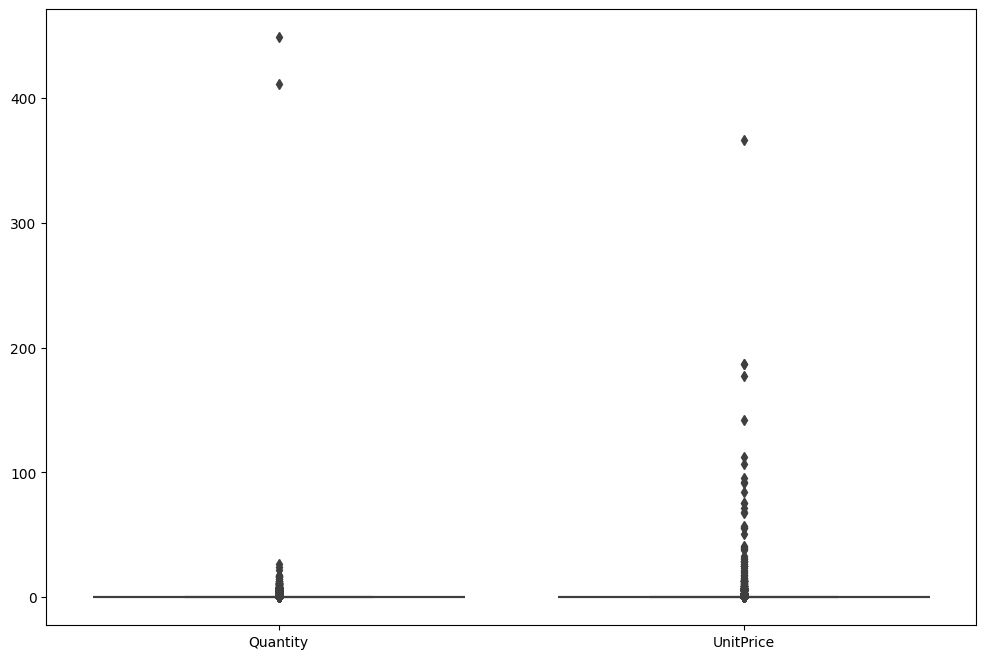

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale

df = customer_df.select_dtypes('number').drop(columns = 'CustomerID').apply(scale)

plt.figure(figsize = (12,8))
sns.boxplot(df);

Pelo gráfico acima, é possível observar que existem muitos outliers neste dataset.

Para sabermos a quantidade exata de outliers em cada uma destas colunas, pode-se definir uma função para calcular isto, conforme segue abaixo, onde q1 é o primeiro quartil, q3 é o terceiro quartil e iqr é o intervalo interquartil. Utilizou-se como padrão um fator = 1.5.

In [33]:
import numpy as np

def is_outlier (array):
    q1, q3 = np.quantile(array, [0.25, 0.75])
    iqr = q3-q1

    upper_outlier = q3 + 1.5*iqr
    lower_outlier = q1 - 1.5*iqr

    return ((array<lower_outlier) | (array>upper_outlier))

Aplicando a função as colunas do dataset, somando as quantidades, tem-se os dados da quantidade de outlier por coluna numérica.

In [34]:
df = customer_df.select_dtypes('number').drop(columns = 'CustomerID')

df.apply(is_outlier).sum()

Quantity     25616
UnitPrice    34112
dtype: int64

Portanto, considerados os argumentos padrão do gráfico "boxplot", tem-se 25616 outliers na coluna "Quantity" e 34112 na coluna "UnitPrice".

Contudo, para fins de resolução do projeto, adotou-se que são de fato outliers somente os seguintes valores:
- "Quantity" maiores que 10000
- "UnitPrice" maiores que 5000

Assim, para eliminar estes dados, pode-se aplicar filtros no dataset, conforme segue

In [35]:
# Filtro de outliers na coluna "Quantity"
customer_df = customer_df[customer_df['Quantity']<=10000]

In [36]:
# Filtro de outliers na coluna "UnitPrice"
customer_df = customer_df[customer_df['UnitPrice']<=5000]

Avaliando-se agora as estatísticas descritivas do dataset,

In [38]:
customer_df.select_dtypes('number').drop(columns = 'CustomerID').describe()

,Quantity,UnitPrice
count,392689.000000,392689.000000
mean,12.724550,3.105194
std,43.083696,18.055047
min,1.000000,0.001000
25%,2.000000,1.250000
50%,6.000000,1.950000
75%,12.000000,3.750000
max,4800.000000,4161.060000


Percebe-se agora um desvio padrão bem menor para ambas as colunas e também os valores máximos obedecendo ao filtro aplicado anteriormente, com os dados de "Quantity" no máximo iguais a 4800 e "UnitPrice" na casa de 4161,06.

### Total de vendas

Conforme analisado anteriormente nas demandas e objetivos do projeto, se torna necessário a criação de uma nova coluna no dataset contendo o valor total da compra. Para isso, utiliza-se das colunas com a quantidade de produtos vendidos e do valor unitário de cada um, fazendo então a multiplicação destas informações.

In [39]:
customer_df['TotalSale'] = customer_df['Quantity']*customer_df['UnitPrice']

In [40]:
customer_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSale
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


### Última data

Ainda, para o cálculo da Recência, precisa-se da última data em que foi registrada uma compra na loja. Com este dado em mãos, ai sim é possível fazer a diferença de dias entre a última compra do site e a última compra de cada cliente em específico.

Como foi convertido anteriormente os dados da coluna "InvoiceDate" para datetime, isto permite utilizar a função max( ) para encontrar o último dia registrado no dataset.

In [41]:
customer_df['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

Portanto, a última compra registrada no site foi em 09/12/2011, ás 12:50. Salvando isto em uma variável,

In [42]:
last_date = customer_df['InvoiceDate'].max()

## Gráficos

Feitos os devidos tratamentos e ajustes no dataset, criada a coluna com os valores totais de vendas, agora é possível plotar os gráficos solicitados e dispostos no objetivo do projeto anteriormente.

Para tal, utilizou-se neste projeto a biblioteca Seaborn e Matplotlib.

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# ajustando o estilo da grade do gráfico
sns.set_style('darkgrid')

### Top 10 países com maior valor em vendas

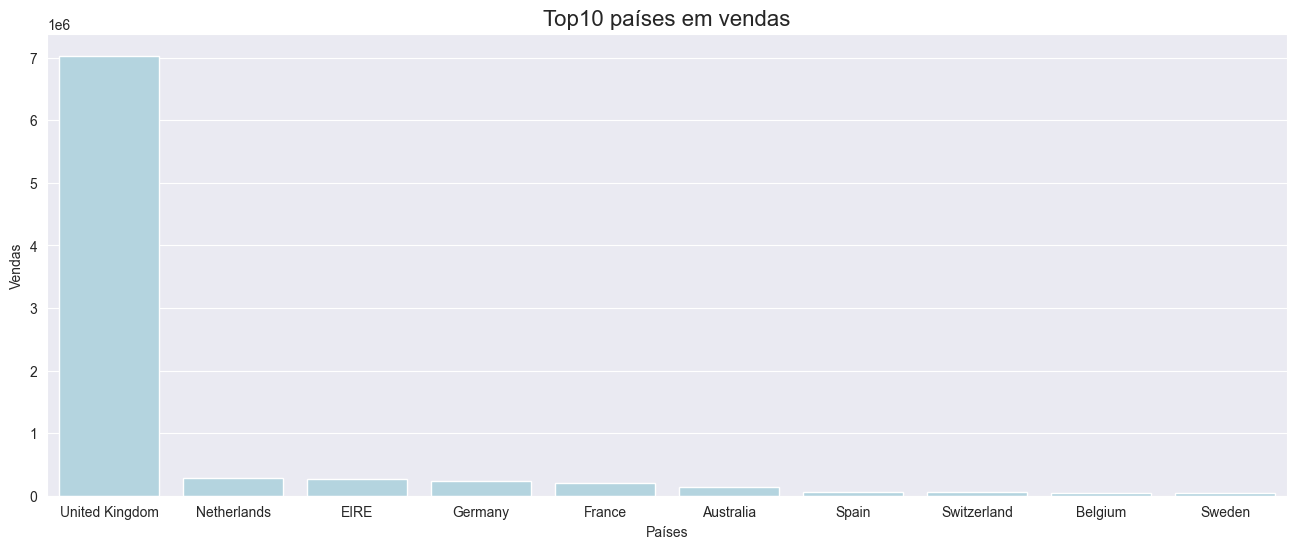

In [44]:
# ajustando o dataset
data = customer_df.groupby(by = 'Country')['TotalSale'].agg('sum').sort_values(ascending = False).reset_index().head(10)

# plotando o gráfico
plt.figure(figsize = (16,6))
sns.barplot(
    data,
    x = 'Country',
    y = 'TotalSale',
    errorbar = ('ci', False),
    color = 'lightblue'
)
plt.title('Top10 países em vendas', fontsize = 16)
plt.xlabel('Países')
plt.ylabel('Vendas')
plt.show()

### Top10 produtos mais vendidos

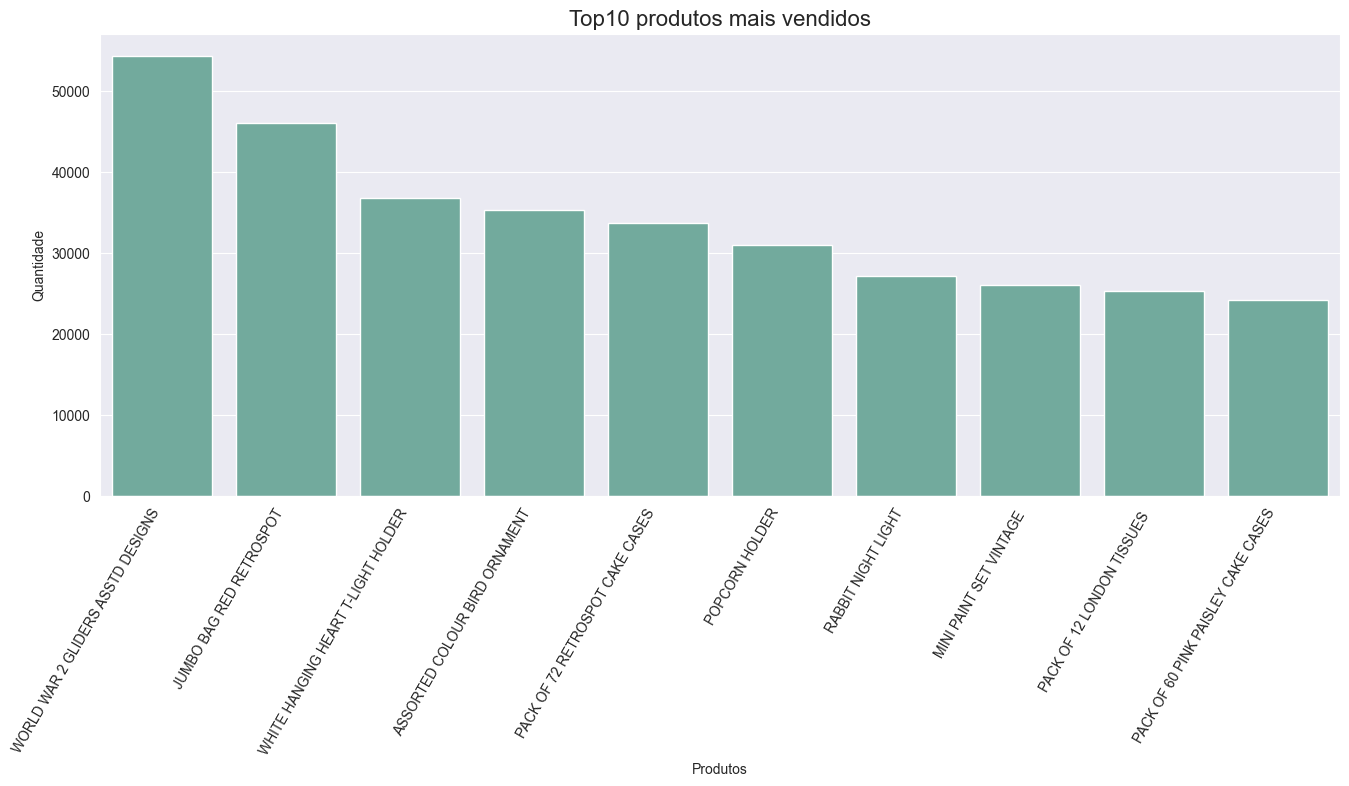

In [45]:
# ajustando o dataset
data = customer_df.groupby(by = 'Description')['Quantity'].agg('sum').sort_values(ascending = False).reset_index().head(10)

# plotando o gráfico
plt.figure(figsize = (16,6))
sns.barplot(
    data,
    x = 'Description',
    y = 'Quantity',
    errorbar = ('ci', False),
    color = '#69b3a2'
)
plt.xticks(rotation = 60, ha = 'right')
plt.title('Top10 produtos mais vendidos', fontsize = 16)
plt.xlabel('Produtos')
plt.ylabel('Quantidade')
plt.show()

### Valor de venda total por mês

Para saber-se os valores de vendas por mês, primeiro é necessário extrair o mês da data de cada fatura e salvar em uma nova coluna do dataset. Desta forma, foi criada a coluna 'InvoiceMonth' com o nome dos meses presentes nas datas de cada compra.

In [46]:
customer_df['InvoiceMonth'] = customer_df['InvoiceDate'].dt.month_name()

In [47]:
customer_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSale,InvoiceMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,December
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,December
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,December
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,December
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,December


Feito isso, agora é possível agrupar os valores totais de vendas por mês, para então plotar-se o gráfico.

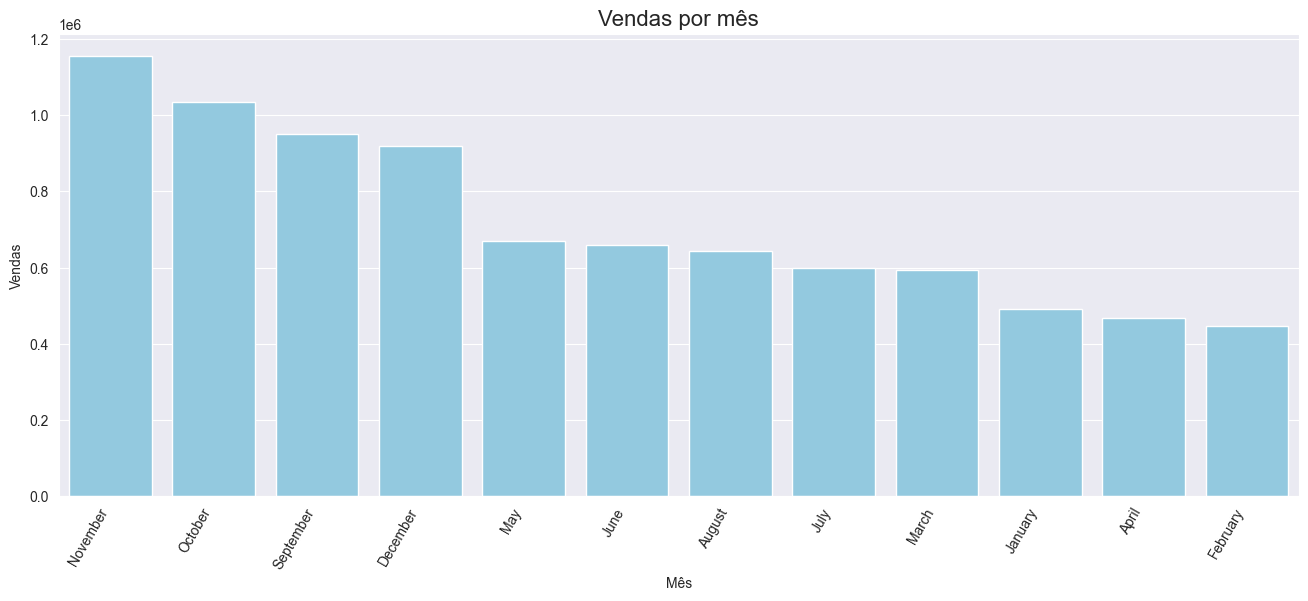

In [48]:
# ajustando o dataset
data = customer_df.groupby(by = 'InvoiceMonth')['TotalSale'].agg('sum').sort_values(ascending = False).reset_index()

# plotando o gráfico
plt.figure(figsize = (16,6))
sns.barplot(
    data,
    x = 'InvoiceMonth',
    y = 'TotalSale',
    errorbar = ('ci', False),
    color = 'skyblue'
)
plt.xticks(rotation = 60, ha = 'right')
plt.title('Vendas por mês', fontsize = 16)
plt.xlabel('Mês')
plt.ylabel('Vendas')
plt.show()

### Valor de venda total por mês e por país

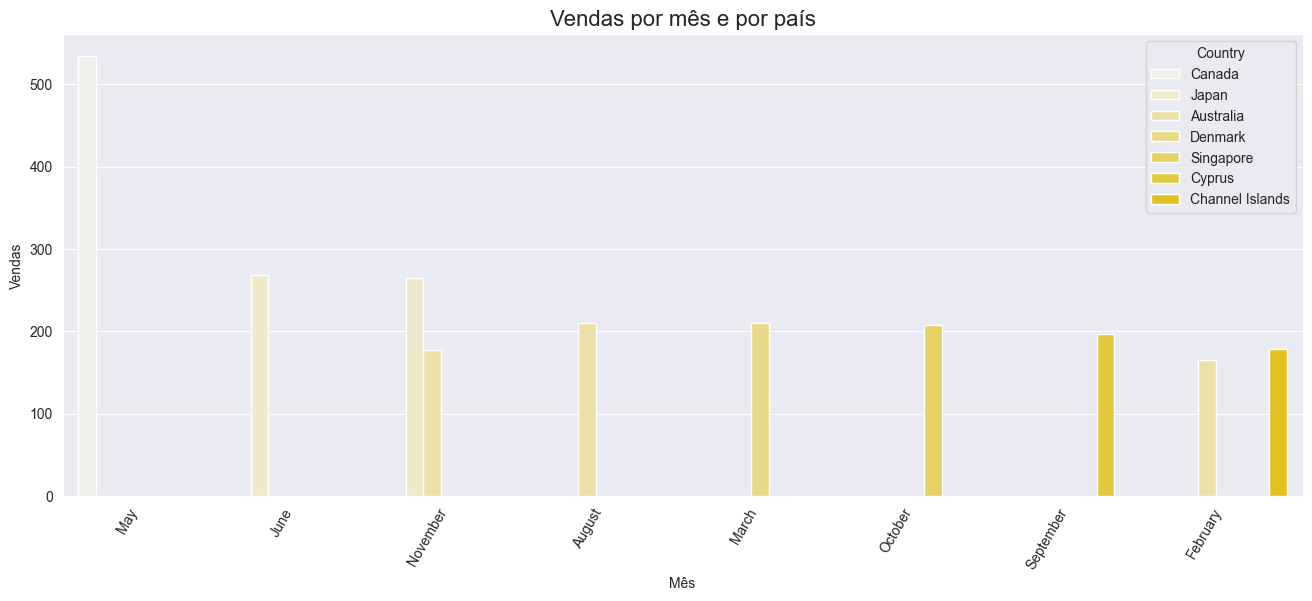

In [50]:
# ajustando o dataset
data = customer_df.groupby(by = ['InvoiceMonth', 'Country'])['TotalSale'].agg('mean').sort_values(ascending = False).reset_index().head(10)

# plotando o gráfico
plt.figure(figsize = (16,6))
sns.barplot(
    data,
    x = 'InvoiceMonth',
    y = 'TotalSale',
    hue = 'Country',
    errorbar = ('ci', False),
    color = 'gold'
)
plt.xticks(rotation = 60, ha = 'right')
plt.title('Vendas por mês e por país', fontsize = 16)
plt.xlabel('Mês')
plt.ylabel('Vendas')
plt.show()